# Predicting Salaries of Different Data Science Jobs

## Phase 2: Statistical Modelling

### Group Number: Group 28

### Group Members: 
* Lance Belen (s3944846)
* Darby Vogt (s3948074)
* Laura Gatt (s3945256)
* Luke Zuell (s3948720)

### Table of Contents
* [Introduction](#intro)
 + [Phase 1 Summary](#phase_1_summary)
 + [Report Overview](#overview)
 + [Overview of Methodology](#methodology)<br>
 <br>
* [Statistical Modelling](#modelling)
 + [Full Model](#full_model)
 + [Feature Selection](#feature_selection)<br>
 <br>
* [Critique & Limitations](#critique)
* [Summary & Conclusions](#sum_conc)
 + [Project Summary](#proj_sum)
 + [Summary of Findings](#findings)
 + [Conclusions](#conclusions)

## <u><b>Introduction</b></u> <a id = 'intro'></a>

### Phase 1 Summary <a id = 'phase_1_summary'></a>
In our Phase 1 report, we introduced the data that we are further investigating for this phase, which is the data for the Salaries of Different Data Science Jobs. We presented the variables and the target feature for modelling this data, as well as the necessary details related to it. Some data cleaning and preprocessing was also done to prepare the dataset for statistical modelling in this phase. Our chosen dataset was fairly clean to begin with, so there were not much changes during this step aside from dropping columns and just ensuring that the dataset is as intended. Lastly, we presented a visualisation of the dataset through different graphs and charts that are one-variable, two-variable, and three-variable plots. This visualisation gave an idea of the relevant connections between each feature and the target feature of the dataset which will be useful for our modelling in this phase.

For our Phase 2 report, we will be making a minor change to the dataset which is replacing spaces in the values with an underscore.

### Report Overview <a id = 'overview'></a>
For our Phase 2 report, we will be modelling our prepared dataset from Phase 1 and analysing the results of our model. We will also discuss our approach in detail and provide a summary of our findings. Hence, this report is broken down into three sections: Statistical Modelling, Critique & Limitations, and Summary & Conclusions.

1) <u>Statistical Modelling</u> <br>
For our Statistical Modelling section, we will first present an overview of the Full Model. We will also do a model selection to determine which of the features are relevant for modelling. An overview of the Reduced Model will be presented as well.  Dianostic checks will be made for both the Full Model and the Reduced Model and an analysis of the regression results will also be provided. The diagnostic check is for identifying any signs of violations of the regression assumptions.

2) <u>Critique & Limitations and Summary & Conclusions</u> <br>
Finally, we will discuss the strengths and weaknesses of our approach in detail and provide a summary of the entire project, a summary of our findings, and our detailed conclusion.






### Overview of Methodology <a id = 'methodology'></a>
Firstly, we will present the full model of the dataset and construct the regression formula. One-hot-encoding will be performed for categorical features to define a proper statistical model formula, which will then be used to fit an Ordinary Least Sqaures (OLS) model to our data. Through these steps, the variables and terms in the full model will be introduced.

A model selection will be performed to identify the features that are useful for modelling and isolate the ones that are not (this will be the Reduced Model). We will also perform the same steps that we made for the full model with the reduced model except for one-hot-encoding as this only has to be done once. Once again, through this, the variables and terms in the reduced model will be presented as an overview.

We will then present some plots of residuals and predicted values to observe any trend or key findings in the model. We will also provide an analysis of the results of the regression and check whether there are any signs of violations of the regression assumptions. This analysis will be done on both the full model and the reduced model.

## <u><b>Statistical Modelling</b></u> <a id = 'modelling'></a>

#### Import Modules and CSV File

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

url = 'https://raw.githubusercontent.com/labelenn/MC2-Phase-2-Report/main/phase_1_orig.csv'
ds_data = pd.read_csv(url, index_col = False)
ds_data.drop(columns = 'Unnamed: 0', inplace = True)
ds_data.sample(10, random_state = 1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
65,2020,EN,FT,Data Scientist,62726,DE,50,DE,S
237,2021,MI,FT,Data Scientist,46809,ES,100,ES,M
147,2021,MI,FT,Data Engineer,90000,US,100,US,L
464,2022,SE,FT,Principal Data Scientist,162674,DE,100,DE,M
187,2021,EX,FT,Data Science Consultant,69741,FR,100,ES,S
233,2021,SE,FT,Data Analyst,200000,US,100,US,L
339,2022,SE,FT,Data Analyst,109280,US,100,US,M
482,2022,EX,FT,Data Engineer,324000,US,100,US,M
241,2021,MI,FT,Data Analyst,80000,US,100,US,L
88,2021,SE,FT,Lead Data Analyst,170000,US,100,US,L


#### Additional Changes to the Dataset for Statistical Modelling

We will ensure that the values in the dataset has no spaces by replacing it with an underscore.

In [ ]:
ds_data = ds_data.replace(' ', '_', regex = True)

In [ ]:
ds_data.sample(10, random_state = 1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
65,2020,EN,FT,Data_Scientist,62726,DE,50,DE,S
237,2021,MI,FT,Data_Scientist,46809,ES,100,ES,M
147,2021,MI,FT,Data_Engineer,90000,US,100,US,L
464,2022,SE,FT,Principal_Data_Scientist,162674,DE,100,DE,M
187,2021,EX,FT,Data_Science_Consultant,69741,FR,100,ES,S
233,2021,SE,FT,Data_Analyst,200000,US,100,US,L
339,2022,SE,FT,Data_Analyst,109280,US,100,US,M
482,2022,EX,FT,Data_Engineer,324000,US,100,US,M
241,2021,MI,FT,Data_Analyst,80000,US,100,US,L
88,2021,SE,FT,Lead_Data_Analyst,170000,US,100,US,L


### Full Model<a id = 'full_model'></a>

We will first use a full model to fit a multiple linear regression that will predict the salary using all of the features in our dataset.

In [ ]:
ds_data.sample(10, random_state = 1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
65,2020,EN,FT,Data_Scientist,62726,DE,50,DE,S
237,2021,MI,FT,Data_Scientist,46809,ES,100,ES,M
147,2021,MI,FT,Data_Engineer,90000,US,100,US,L
464,2022,SE,FT,Principal_Data_Scientist,162674,DE,100,DE,M
187,2021,EX,FT,Data_Science_Consultant,69741,FR,100,ES,S
233,2021,SE,FT,Data_Analyst,200000,US,100,US,L
339,2022,SE,FT,Data_Analyst,109280,US,100,US,M
482,2022,EX,FT,Data_Engineer,324000,US,100,US,M
241,2021,MI,FT,Data_Analyst,80000,US,100,US,L
88,2021,SE,FT,Lead_Data_Analyst,170000,US,100,US,L


We will start by constructing the regression formula.

In [ ]:
formula_ind_vars = ' + '.join(ds_data.drop(columns='salary_in_usd').columns)
formula_string = 'salary_in_usd ~ ' + formula_ind_vars
print('formula_string: ', formula_string)

formula_string:  salary_in_usd ~ work_year + experience_level + employment_type + job_title + employee_residence + remote_ratio + company_location + company_size


We will have to do one-hot-encoding for the categorical features to be able to do automatic variable selection with the formula. The formula above cannot do automatic variable selection. The next code will be one-hot-encoding the categorical features and creating a new formula string with the encoded dataset. We will also convert work_year and remote_ratio as an object data type as these columns are also categorical features. Moreover, we will perform a log transformation on the salary values to compress it to a smaller range.

In [ ]:
ds_data['work_year'] = ds_data['work_year'].astype('object')
ds_data['remote_ratio'] = ds_data['remote_ratio'].astype('object')

ds_data['salary_in_usd'] = np.log(ds_data['salary_in_usd'])

data_encoded = pd.get_dummies(ds_data, drop_first=True)
data_encoded.sample(10, random_state = 1)

,salary_in_usd,work_year_2021,work_year_2022,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI_Scientist,job_title_Analytics_Engineer,job_title_Applied_Data_Scientist,job_title_Applied_Machine_Learning_Scientist,job_title_BI_Data_Analyst,job_title_Big_Data_Architect,job_title_Big_Data_Engineer,job_title_Business_Data_Analyst,job_title_Cloud_Data_Engineer,job_title_Computer_Vision_Engineer,job_title_Computer_Vision_Software_Engineer,job_title_Data_Analyst,job_title_Data_Analytics_Engineer,job_title_Data_Analytics_Lead,job_title_Data_Analytics_Manager,job_title_Data_Architect,job_title_Data_Engineer,job_title_Data_Engineering_Manager,job_title_Data_Science_Consultant,job_title_Data_Science_Engineer,job_title_Data_Science_Manager,job_title_Data_Scientist,job_title_Data_Specialist,job_title_Director_of_Data_Engineering,job_title_Director_of_Data_Science,job_title_ETL_Developer,job_title_Finance_Data_Analyst,job_title_Financial_Data_Analyst,job_title_Head_of_Data,job_title_Head_of_Data_Science,job_title_Head_of_Machine_Learning,job_title_Lead_Data_Analyst,job_title_Lead_Data_Engineer,job_title_Lead_Data_Scientist,job_title_Lead_Machine_Learning_Engineer,job_title_ML_Engineer,job_title_Machine_Learning_Developer,job_title_Machine_Learning_Engineer,job_title_Machine_Learning_Infrastructure_Engineer,job_title_Machine_Learning_Manager,job_title_Machine_Learning_Scientist,job_title_Marketing_Data_Analyst,job_title_NLP_Engineer,job_title_Principal_Data_Analyst,job_title_Principal_Data_Engineer,job_title_Principal_Data_Scientist,job_title_Product_Data_Analyst,job_title_Research_Scientist,job_title_Staff_Data_Scientist,employee_residence_AR,employee_residence_AT,employee_residence_AU,employee_residence_BE,employee_residence_BG,employee_residence_BO,employee_residence_BR,employee_residence_CA,employee_residence_CH,employee_residence_CL,employee_residence_CN,employee_residence_CO,employee_residence_CZ,employee_residence_DE,employee_residence_DK,employee_residence_DZ,employee_residence_EE,employee_residence_ES,employee_residence_FR,employee_residence_GB,employee_residence_GR,employee_residence_HK,employee_residence_HN,employee_residence_HR,employee_residence_HU,employee_residence_IE,employee_residence_IN,employee_residence_IQ,employee_residence_IR,employee_residence_IT,employee_residence_JE,employee_residence_JP,employee_residence_KE,employee_residence_LU,employee_residence_MD,employee_residence_MT,employee_residence_MX,employee_residence_MY,employee_residence_NG,employee_residence_NL,employee_residence_NZ,employee_residence_PH,employee_residence_PK,employee_residence_PL,employee_residence_PR,employee_residence_PT,employee_residence_RO,employee_residence_RS,employee_residence_RU,employee_residence_SG,employee_residence_SI,employee_residence_TN,employee_residence_TR,employee_residence_UA,employee_residence_US,employee_residence_VN,remote_ratio_50,remote_ratio_100,company_location_AS,company_location_AT,company_location_AU,company_location_BE,company_location_BR,company_location_CA,company_location_CH,company_location_CL,company_location_CN,company_location_CO,company_location_CZ,company_location_DE,company_location_DK,company_location_DZ,company_location_EE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_HN,company_location_HR,company_location_HU,company_location_IE,company_location_IL,company_location_IN,company_location_IQ,company_location_IR,company_location_IT,company_location_JP,company_location_KE,company_location_LU,company_location_MD,company_location_MT,company_location_MX,company_location_MY,company_location_NG,company_location_NL,company_location_NZ,company_location_PK,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
65,11.04653

In [ ]:
formula_indep_vars_encoded = ' + '.join(data_encoded.drop(columns='salary_in_usd').columns)
formula_string_encoded = 'salary_in_usd ~ ' + formula_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  salary_in_usd ~ work_year_2021 + work_year_2022 + experience_level_EX + experience_level_MI + experience_level_SE + employment_type_FL + employment_type_FT + employment_type_PT + job_title_AI_Scientist + job_title_Analytics_Engineer + job_title_Applied_Data_Scientist + job_title_Applied_Machine_Learning_Scientist + job_title_BI_Data_Analyst + job_title_Big_Data_Architect + job_title_Big_Data_Engineer + job_title_Business_Data_Analyst + job_title_Cloud_Data_Engineer + job_title_Computer_Vision_Engineer + job_title_Computer_Vision_Software_Engineer + job_title_Data_Analyst + job_title_Data_Analytics_Engineer + job_title_Data_Analytics_Lead + job_title_Data_Analytics_Manager + job_title_Data_Architect + job_title_Data_Engineer + job_title_Data_Engineering_Manager + job_title_Data_Science_Consultant + job_title_Data_Science_Engineer + job_title_Data_Science_Manager + job_title_Data_Scientist + job_title_Data_Specialist + job_title_Director_of_Data_Engineering + job

Next, we will fit an Ordinary Least Squares (OLS) model to our encoded data.

In [ ]:
fullModel = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
fullModel_fitted = fullModel.fit()
print(fullModel_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     17.36
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          1.24e-121
Time:                        11:04:10   Log-Likelihood:                -150.83
No. Observations:                 607   AIC:                             583.7
Df Residuals:                     466   BIC:                             1205.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

The Full Model's R-squared is 0.839. This means this model explained 84% of the variance in the data. We also observe through the p-values that the features are evenly divided as highly significant and insignificant variables at a 5% level.

We will now define a new dataframe for actual salary vs predicted salary and the full model residuals, but we will first apply an inverse transformation on these values to recover the original value. This dataframe will be used for plotting predicted values and regression residuals later on.

In [ ]:
residuals_full = pd.DataFrame({'actual':  np.exp(data_encoded['salary_in_usd']), 
                               'predicted': np.exp(fullModel_fitted.fittedvalues), 
                               'residual': fullModel_fitted.resid})

residuals_full['residual'] = residuals_full['actual'] - residuals_full['predicted'] 

residuals_full['actual'] = residuals_full['actual'].round(2)
residuals_full['predicted'] = residuals_full['predicted'].round(2)
residuals_full['residual'] = residuals_full['residual'].round(2)

In [ ]:
residuals_full.sample(10, random_state = 1)

,actual,predicted,residual
65,62726.0,47097.19,15628.81
237,46809.0,51670.98,-4861.98
147,90000.0,126424.39,-36424.39
464,162674.0,147684.99,14989.01
187,69741.0,53283.90,16457.10
233,200000.0,116908.48,83091.52
339,109280.0,111123.29,-1843.29
482,324000.0,199861.50,124138.50
241,80000.0,94547.92,-14547.92
88,170000.0,122671.46,47328.54


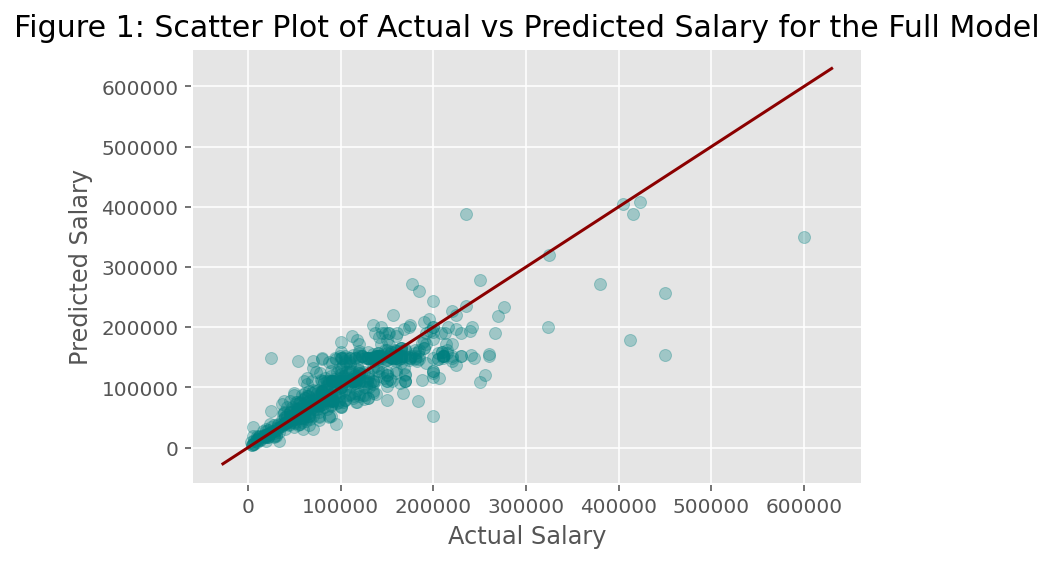

In [ ]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3, color = 'teal');
plot_line(axis=plt.gca(), slope=1, intercept=0, c="darkred");
plt.xlabel('Actual Salary');
plt.ylabel('Predicted Salary');
plt.title('Figure 1: Scatter Plot of Actual vs Predicted Salary for the Full Model', fontsize=15);
plt.show();

From figure 1, we can observe that most of the observations are within the salary value of 300,000 and although the highest salary is 600,000, no predictions were above 450,000.

We will now check whether there are any signs of violations of the regression assumptions.

#### Full Model Diagnostic Checks

1. Linearity of the relationship between target variable and the independent variables
2. Constant variance of the errors
3. Normality of the residual distribution
4. Statistical independence of the residuals

First, we create a scatter plot of residuals.

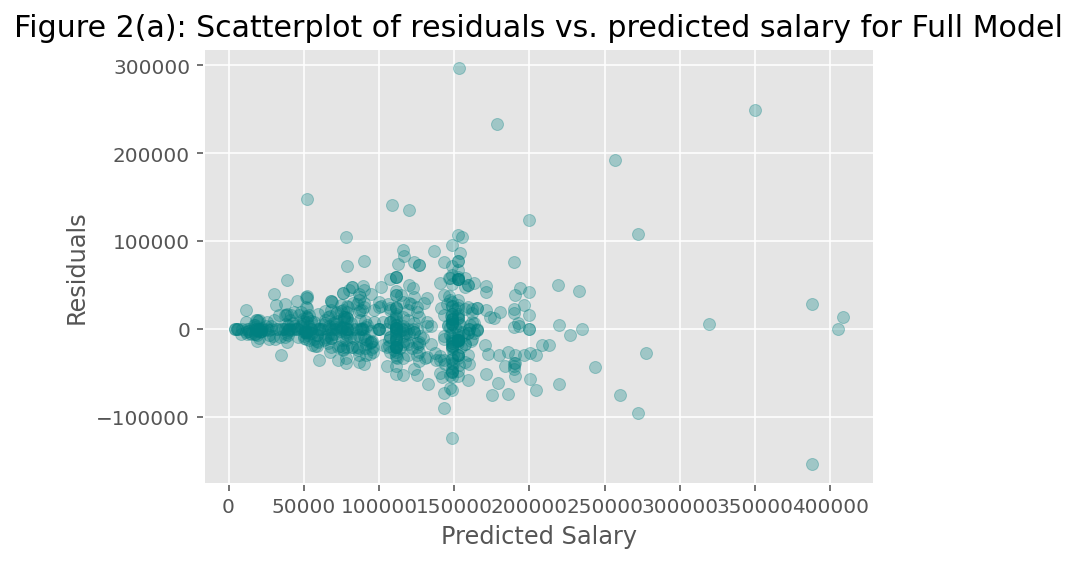

In [ ]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3, color = 'teal');
plt.xlabel('Predicted Salary');
plt.ylabel('Residuals')
plt.title('Figure 2(a): Scatterplot of residuals vs. predicted salary for Full Model', fontsize=15)
plt.show();

In figure 2a, we observe a randomness with the observations and most of it is around 0. This tells us that the assumption of constant variance of errors was not violated.

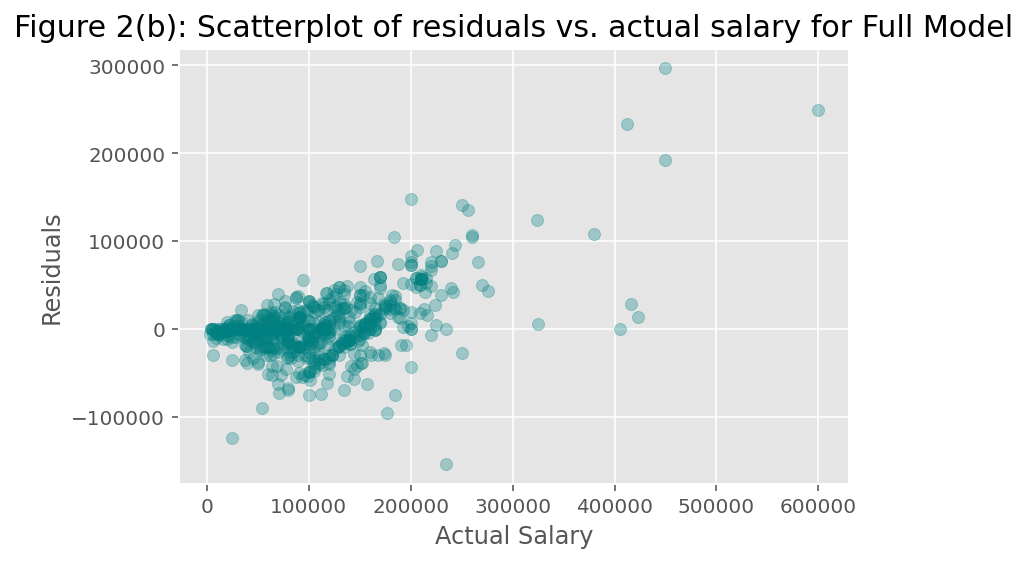

In [ ]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3, color = 'teal');
plt.xlabel('Actual Salary');
plt.ylabel('Residuals')
plt.title('Figure 2(b): Scatterplot of residuals vs. actual salary for Full Model', fontsize=15)
plt.show();

We can see from figure 2b that as the actual salary increases, the residual also increases. Although some of the observations with actual salaries less than 250,000 are predicted to be higher, some of it is also predicted to be lower. Additionally, all observations above the salary value of 250,000 is predicted to be lower than or equal to the actual salary.

Next, let's plot the histograms of actual salary versus predicted salary.

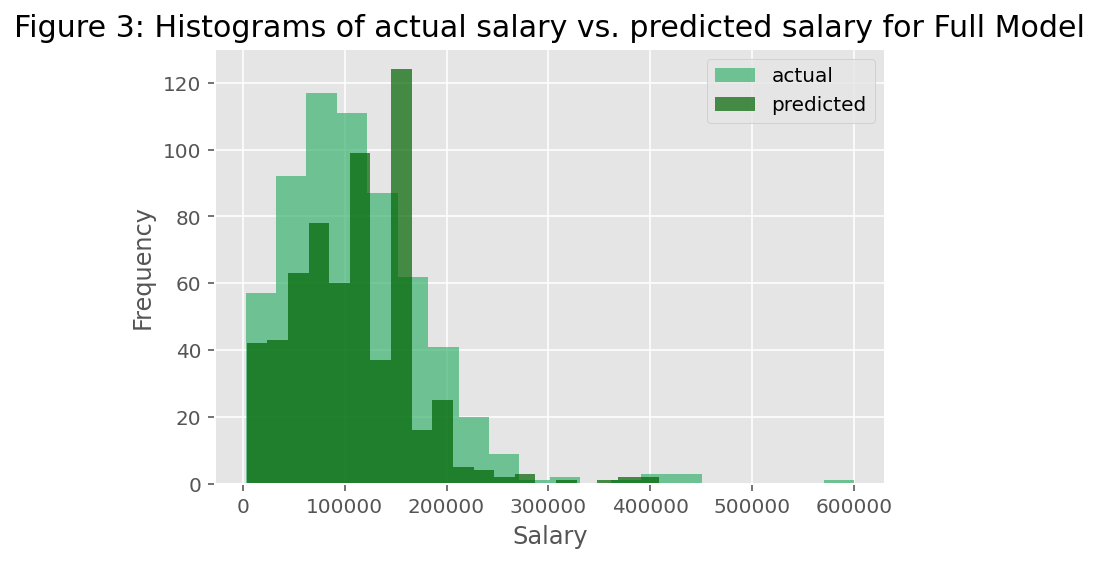

In [ ]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7, color = 'mediumseagreen');
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7, color = 'darkgreen');
plt.xlabel('Salary');
plt.ylabel('Frequency');
plt.title('Figure 3: Histograms of actual salary vs. predicted salary for Full Model', fontsize=15);
plt.legend()
plt.show();

The distributions are observed to be different for the actual and predicted salary. The actual salary is unimodal and slightly right skewed due to possible outliers, whereas the predicted salary is somewhat multimodal and right skewed which is also due to possible outliers.

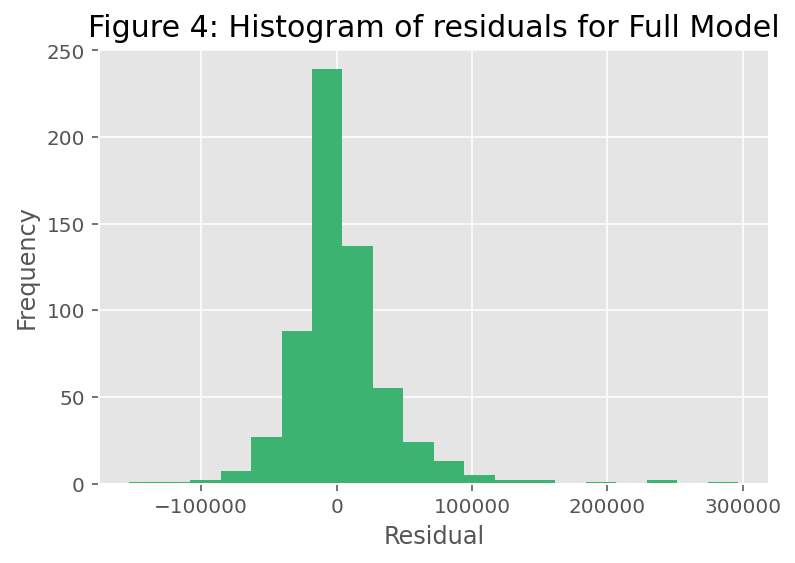

In [ ]:
plt.hist(residuals_full['residual'], bins = 20, color = 'mediumseagreen');
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 4: Histogram of residuals for Full Model', fontsize=15);
plt.show();

From figure 4, we can see that the residuals is somewhat symmetric but slightly skewed to the right, possibly due to outliers. Hence, the normality of the residual distribution is not significantly violated.

### Backwards Feature Selection <a id = 'feature_selection'></a>

We will now perform backwards feature selection to get a reduced model that only consists of features that are important for our modelling. We will do this using the p-values through the code below, which is taken from the <a href = 'https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb'>example regression case study</a>.

In [ ]:
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)
linreg_fit = fullModel_fitted
p_val_cutoff = 0.05
print('\nPerforming backwards feature selection using p-values:')
while True:
    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): 
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: 
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "company_location_GR" with p-value 0.9647

Removing term "employee_residence_AT" with p-value 0.9415

Removing term "employee_residence_DE" with p-value 0.9457

Removing term "employee_residence_RU" with p-value 0.927

Removing term "job_title_Staff_Data_Scientist" with p-value 0.8872

Removing term "company_location_BE" with p-value 0.8575

Removing term "employee_residence_BE" with p-value 0.8575

Removing term "employee_residence_JP" with p-value 0.8688

Removing term "company_location_PL" with p-value 0.7722

Removing term "company_location_NZ" with p-value 0.7885

Removing term "employee_residence_NZ" with p-value 0.7885

Removing term "company_location_DE" with p-value 0.8219

Removing term "company_location_PT" with p-value 0.6008

Removing term "employee_residence_PH" with p-value 0.6366

Removing term "employee_residence_BR" with p-value 0.6919

Removing term "company_location_IT" with p-value 0.6

Removing

Like previously, for the full mode, we defined a new data for the actual verse predicted.


In [ ]:
residuals_reduced = pd.DataFrame({'actual':  np.exp(data_encoded['salary_in_usd']), 
                               'predicted': np.exp(fullModel_fitted.fittedvalues), 
                               'residual': fullModel_fitted.resid})

residuals_full['residual'] = residuals_full['actual'] - residuals_full['predicted'] 
residuals_full['actual'] = residuals_full['actual'].round(2)
residuals_full['predicted'] = residuals_full['predicted'].round(2)
residuals_full['residual'] = residuals_full['residual'].round(2)
residuals_full.sample(10, random_state = 1)

,actual,predicted,residual
65,62726.0,47097.19,15628.81
237,46809.0,51670.98,-4861.98
147,90000.0,126424.39,-36424.39
464,162674.0,147684.99,14989.01
187,69741.0,53283.90,16457.10
233,200000.0,116908.48,83091.52
339,109280.0,111123.29,-1843.29
482,324000.0,199861.50,124138.50
241,80000.0,94547.92,-14547.92
88,170000.0,122671.46,47328.54


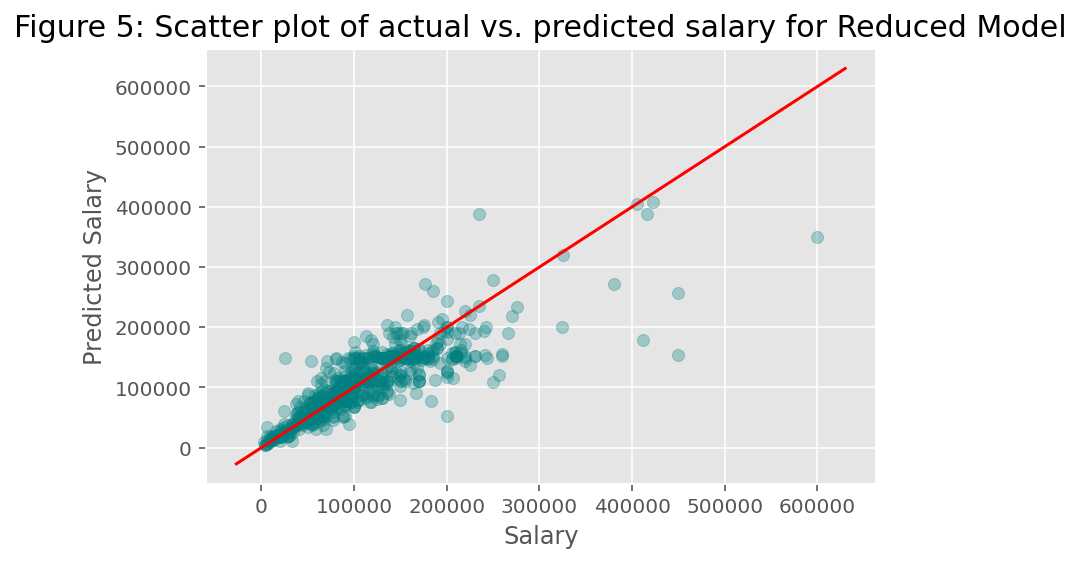

In [ ]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3, color = 'teal');
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Salary');
plt.ylabel('Predicted Salary');
plt.title('Figure 5: Scatter plot of actual vs. predicted salary for Reduced Model', fontsize=15);
plt.show(); 

This is the model that returns an Adjusted R-squared value of 0.819, which explains around 82% of the variance. Also, we left the highly significant and insignificant variables at a 5% level through the p-values.

### Reduced Model Diagnostic Checks <a id = 'feature_selection'></a>

This is the first scattter plot for residual values. 


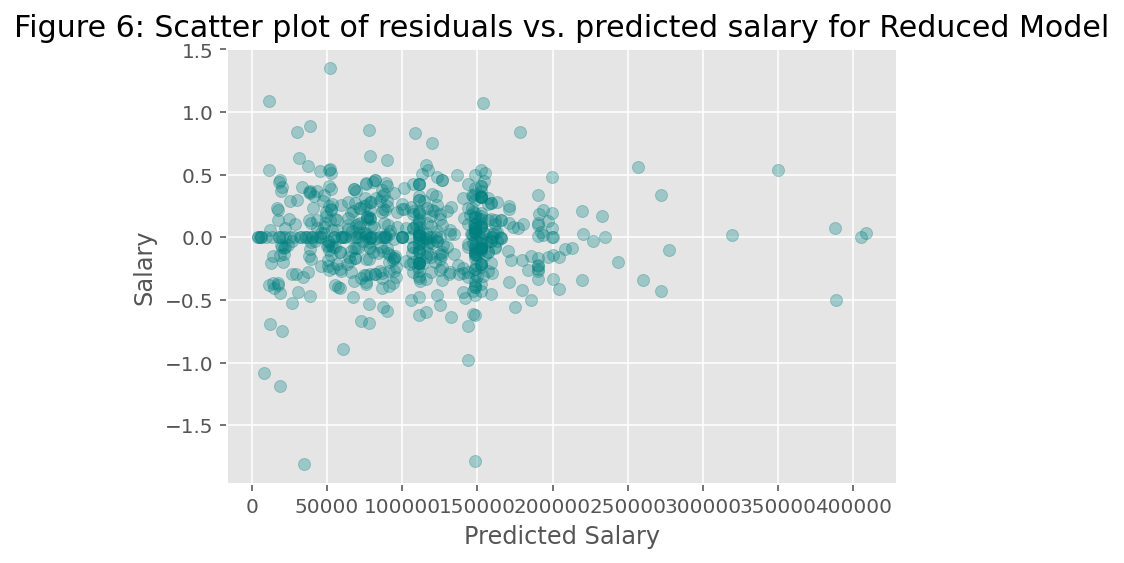

In [ ]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3, color = 'teal');
plt.xlabel('Predicted Salary');
plt.ylabel('Salary')
plt.title('Figure 6: Scatter plot of residuals vs. predicted salary for Reduced Model', fontsize=15)
plt.show();

This is roughly the same as Figure 2(a), with a reduction of impact in the outlieing values.

Again, lets display this as a histogram aswell.

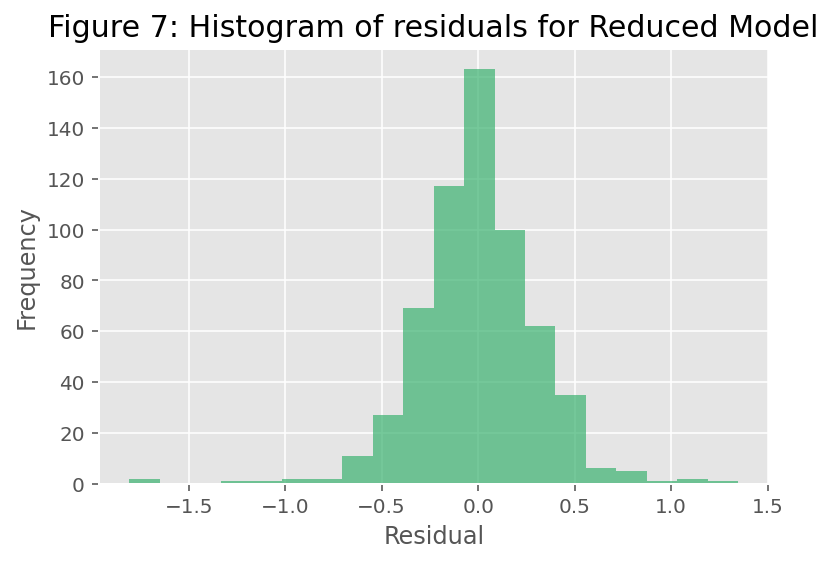

In [ ]:
plt.hist(residuals_reduced['residual'], bins = 20, alpha=0.7, color = 'mediumseagreen');
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 7: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

Figure 7 displays result that we liked, with a somewhat normally distruibuted graph with the symmetry around 0 residual value.

## <u><b>Critique & Limitations</b></u> <a id = 'critique'></a>

In our regressive models we observed a high R squared value of 0.839, indicating that a large amount of the variance was explained by the independent variables (all the columns bar the salary).

Since the residuals follow a normal distribution, they don’t violate the regression assumption and are an indicator that the model is functioning as intended.

The models could have been more accurate if there was more variety and quantity in the dataset, this would allow for more precision in the models.

Another weakness of our dataset was that there were many values for one independent variable/column, with a small portion of them being majority the same. For example, in the ‘employee_residence’ column, ‘US’ vastly outnumbers the other values. This means that some of the values in the same column only occur once or twice, making the data for this particular field is very slim, especially when compared to the aforementioned ‘US’ value.

## <u><b>Summary & Conclusions</b></u> <a id = 'sum_conc'></a>

### Project Summary <a id = 'proj_sum'></a>
In Phase 1, we started by introducing the dataset that we will be using for the entire project. We imported the necessary modules and the csv file of the dataset, then we displayed the description of the features and selected the response variable for our study.

After this, we proceeded to the data cleaning and preprocessing. In this stage, we first checked the columns in the dataset and dropped the ones that are unnecessary for modelling. Then, we checked for missing values and ensured that the data types are as intended. Finally, we checked for any outliers and unusual values that needs to be dealt with.

We then presented the dataset through a visualisation of one-variable, two-variable, and three-variable plots. Lastly, we ended phase 1 with a summary and conclusion of what we have done.

For Phase 2, we first gave a brief summary of the work that we did in Phase 1, provided an overview of the contents of our Phase 2 report, as well as an overview of the methodology that we will be using which is multiple linear regression.

We then proceeded with modelling our dataset, through a Full Model and a Reduced Model. We first imported the necessary modules and the dataset file and made additional changes as needed to make the dataset more suitable with modelling. We then introduced the full model, constructed the regression formula and fit an Ordinary Least Squares model. Then, we plotted the residuals and analysed the regression results and made some diagnostic checks to see if any violations were made on the regression assumptions. After this, we proceeded to do the same steps with our reduced model after the backwards feature selection.

Finally, we finished off the project by discussing the strength and weaknesses of our approach, presenting a summary of our finding and our conclusion for the entire project.

### Summary of Findings <a id = 'findings'></a>

In the full model diagnostic checks, its clear to see in figure 2a that the majority of the scatter plot is clustered around 0, meaning that the assumption of constant variance of errors was not violated. It can also be seen in figure 2b that the assumptions still isn't violated as when the salary increases, so does the residual. In figure 3 and figure 4, it can be noted that for the full model, the predicted salaries get close to the actual salaries, but not as close as the reduced model, hence why the recuded model would be more favourable when predicting the salaries. 

The R-squared value being 0.839 for the full model means that 84% of the variance is being explained, which is a very high value, meaning that the data is more accurate. 


In comparison to the full model, the reduced model seems to predict the salaries far more accurately. The backwards feature selection is used to get the reduced model but only using the important and significant features that will be helpful when predicting the salary. It will remove all insignificant features so that the predictions are more accurate and credible. 


Similarly to the full model, when applying the diagnostic checks, figure 6 is very similar to figure 2a, where the cluster is situated about the 0 mark, meaning there are no violations to the assumptions. When applying a histogram this time around in figure 7, there seems to be a little more symmetry with this reduced model, showing that this model proves more accurate when predicting salaries . 

The R-squared value being 0.819 for the reduced model means that 82% of the variance is being explained, which is also a very high value, meaning that the data is quite accurate.



### Conclusions <a id = 'conclusions'></a>

Our initial goal and objective from phase 1 was to create an effective and accurate statistical model that can predict the salaries of different job titles of data scientists, effectively improving users lives by giving them a predicted version of what their salary would be like depending on a range of factors. Through our findings with our full model and reduced model, we found that the reduced model gets the closest to the actual salaries when predicting, thus why this model is our chosen model for predicting salaries. We successfully figured out which features were the most important in the predicting process and used these features in our reduced model to find our predicted salaries. This also meant that we ultimately achieved our goals through narrowing the dataset to use more specific features and removing the insignificant features of the dataset. 
